In [1]:
import sys

In [2]:
sys.path.append("../")

In [11]:
import numpy as np
import openml
import pandas as pd
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from src.logistic_regression import LogisticRegression
from src.prepare_datasets import prepare_data

DATASETS = {
    # small datasets
    1462: "Class",
    871: "binaryClass",
    # 1120: "class:",
    # big datasets
    # 1510: "Class",
    # 1050: "c",
    # 1049: "c",
    # 833: "binaryClass",
    # 846: "binaryClass",
    # 879: "binaryClass",
}

classifiers = {
    "Logistic Regression (SGD) with interactions": {
        "add_interactions": True,
        "learning_rate": 0.01,
        "max_iter": 500,
        "tolerance": 1e-7,
        "optimizer": "sgd",
    },
    "Logistic Regression (SGD)": {
        "add_interactions": False,
        "learning_rate": 0.01,
        "max_iter": 500,
        "tolerance": 1e-7,
        "optimizer": "sgd",
    },
    "Logistic Regression (Adam) with interactions": {
        "add_interactions": True,
        "learning_rate": 0.01,
        "max_iter": 500,
        "tolerance": 1e-7,
        "optimizer": "adam",
    },
    "Logistic Regression (Adam)": {
        "add_interactions": False,
        "learning_rate": 0.01,
        "max_iter": 500,
        "tolerance": 1e-7,
        "optimizer": "adam",
    },
    "Logistic Regression (IRLS) with interactions": {
        "add_interactions": True,
        "learning_rate": 0.01,
        "max_iter": 500,
        "tolerance": 1e-7,
        "optimizer": "irls",
    },
    "Logistic Regression (IRLS)": {
        "add_interactions": False,
        "learning_rate": 0.01,
        "max_iter": 500,
        "tolerance": 1e-7,
        "optimizer": "irls",
    },
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis,
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis,
    "Decision Tree": DecisionTreeClassifier,
    "Random Forest": RandomForestClassifier,
}


def compare_with_different_classifiers(no_iters=10, test_size=0.2):
    # Compare the classification performance of logistic regression (try all 3 methods: IWLS, SGD, ADAM) and LDA, QDA, Decision tree and Random Forest.
    results = []

    for i, (dataset_number, target_column) in enumerate(DATASETS.items(), start=1):
        df = openml.datasets.get_dataset(dataset_number).get_data()[0]

        X, y = prepare_data(df, target_column)
        print(f"Dataset {i}:")

        for name, params_or_model in list(classifiers.items()):
            accuracy = []

            if "Logistic Regression" in name:
                model = LogisticRegression(**params_or_model)
            else:
                model = params_or_model()
            print(f"Fitting model: {name}")
            for _ in range(no_iters):
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=test_size, random_state=None
                )

                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                accuracy.append(balanced_accuracy_score(y_test, y_pred))
            avg_accuracy = np.mean(accuracy)
            results.append(
                {
                    "Dataset": f"Dataset_{i}",
                    "Classifier": name,
                    "Avg_Balanced_Accuracy": avg_accuracy,
                }
            )
            if "Logistic Regression" in name:
                model.plot_log_likelihood()

    return pd.DataFrame(results)

Dataset 1:
Fitting model: Logistic Regression (SGD) with interactions


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:24<00:00, 20.67it/s]


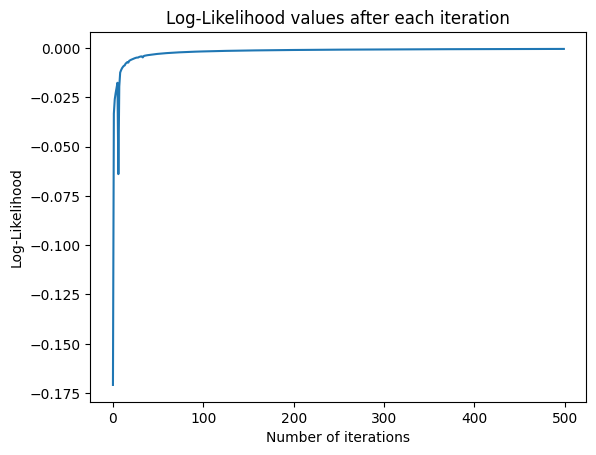

Fitting model: Logistic Regression (SGD)


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:25<00:00, 19.63it/s]


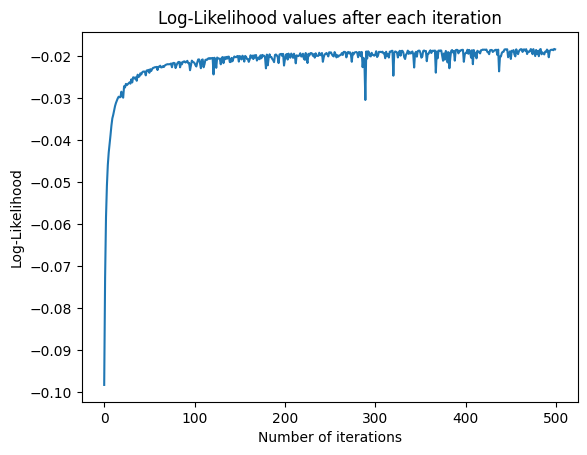

Fitting model: Logistic Regression (Adam) with interactions


Optimizing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 987.56it/s]


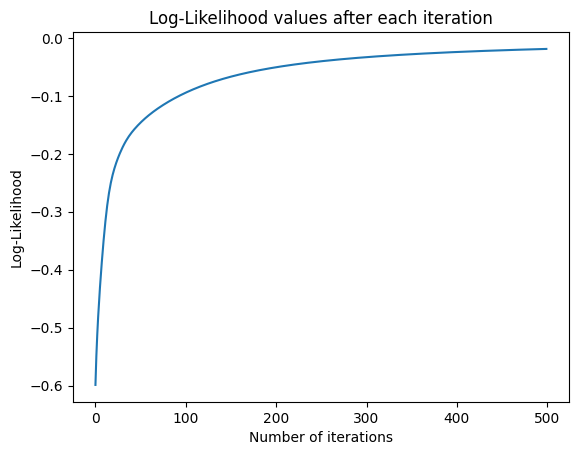

Fitting model: Logistic Regression (Adam)


Optimizing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1998.07it/s]


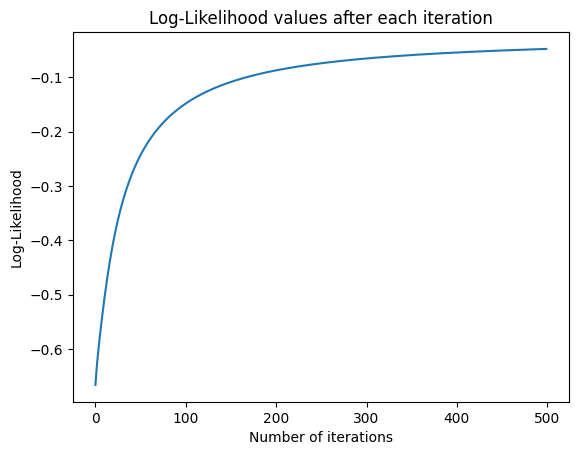

Fitting model: Logistic Regression (IRLS) with interactions


Optimizing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 102.64it/s]


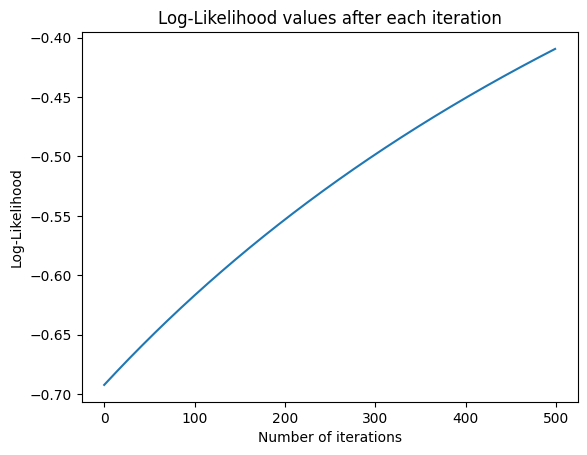

Fitting model: Logistic Regression (IRLS)


Optimizing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 113.42it/s]


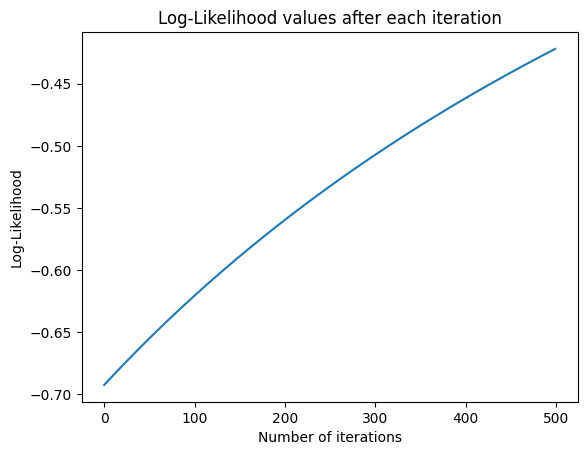

Fitting model: Linear Discriminant Analysis
Fitting model: Quadratic Discriminant Analysis
Fitting model: Decision Tree
Fitting model: Random Forest
Dataset 2:
Fitting model: Logistic Regression (SGD) with interactions


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:06<00:00,  7.55it/s]


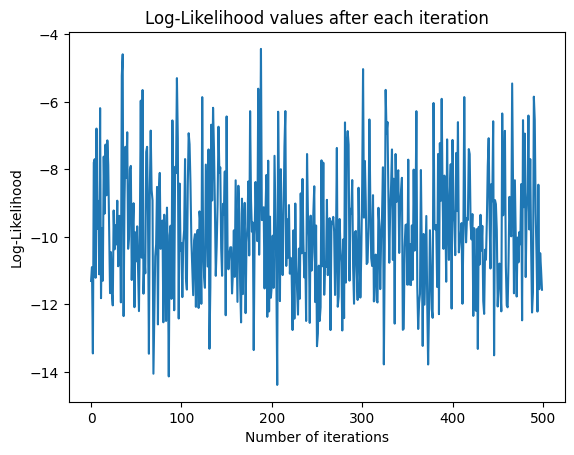

Fitting model: Logistic Regression (SGD)


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:10<00:00,  7.13it/s]


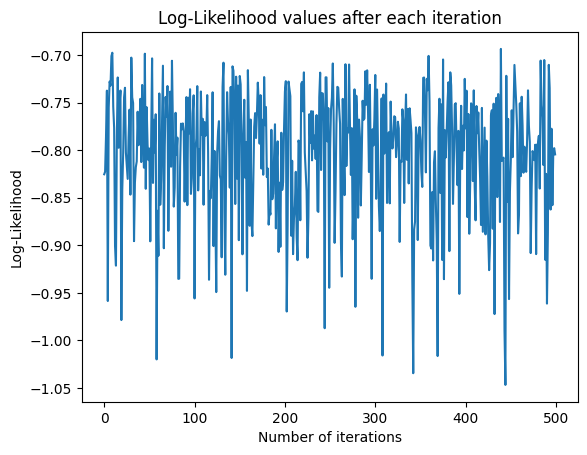

Fitting model: Logistic Regression (Adam) with interactions


Optimizing:  46%|███████████████████████████████████████████████████████████████████████████▎                                                                                       | 231/500 [00:00<00:00, 719.71it/s]


Stopping criteria reached after  232  iterations


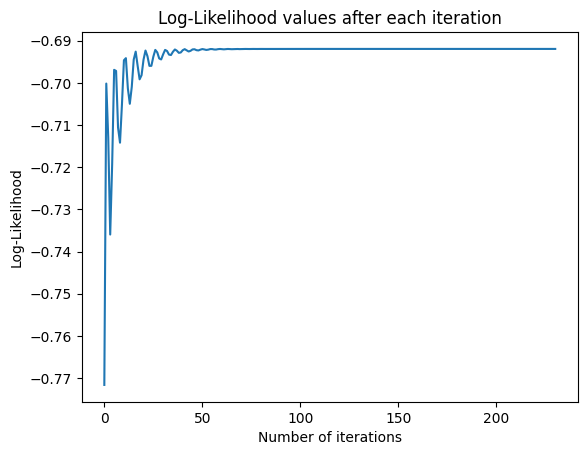

Fitting model: Logistic Regression (Adam)


Optimizing:  43%|██████████████████████████████████████████████████████████████████████▋                                                                                            | 217/500 [00:00<00:00, 679.54it/s]


Stopping criteria reached after  218  iterations


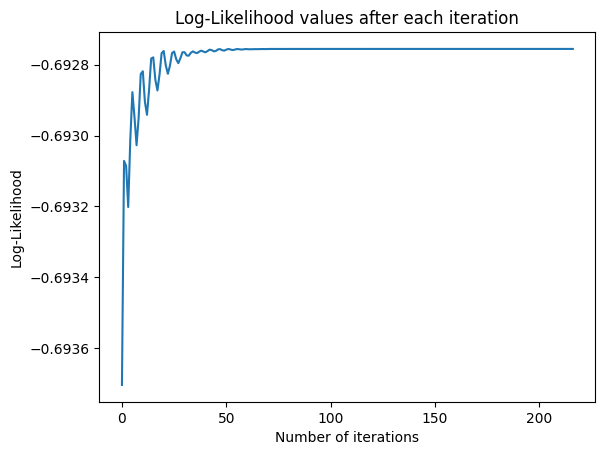

Fitting model: Logistic Regression (IRLS) with interactions


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:30<00:00, 16.17it/s]


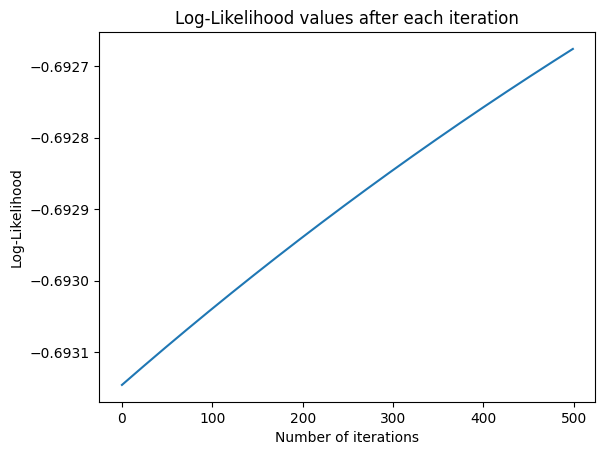

Fitting model: Logistic Regression (IRLS)


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:32<00:00, 15.41it/s]


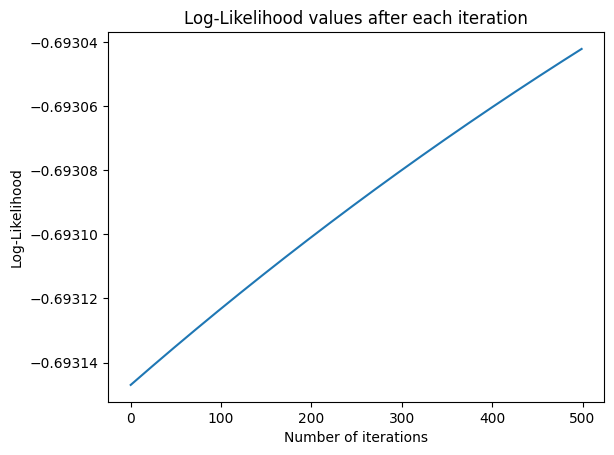

Fitting model: Linear Discriminant Analysis
Fitting model: Quadratic Discriminant Analysis
Fitting model: Decision Tree
Fitting model: Random Forest
Dataset 3:
Fitting model: Logistic Regression (SGD) with interactions


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [06:50<00:00,  1.22it/s]


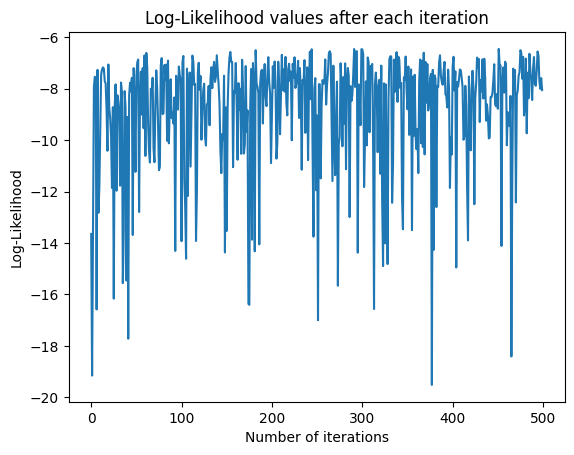

Fitting model: Logistic Regression (SGD)


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [04:57<00:00,  1.68it/s]


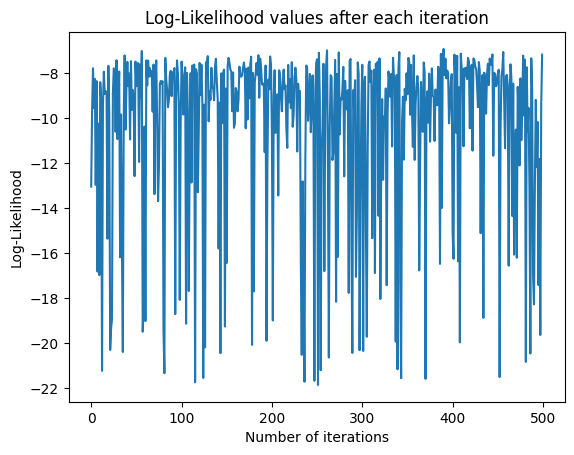

Fitting model: Logistic Regression (Adam) with interactions


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:06<00:00, 79.33it/s]


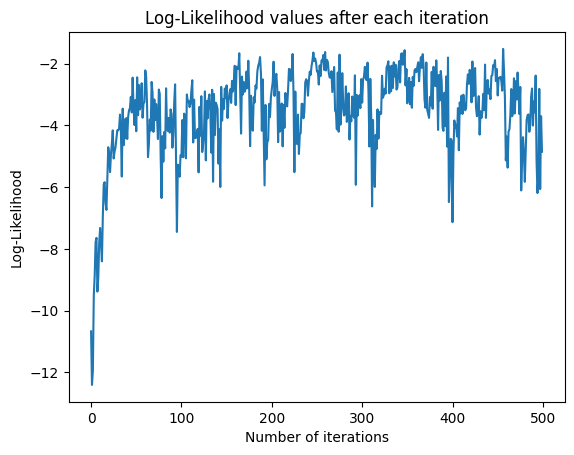

Fitting model: Logistic Regression (Adam)


Optimizing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 175.68it/s]


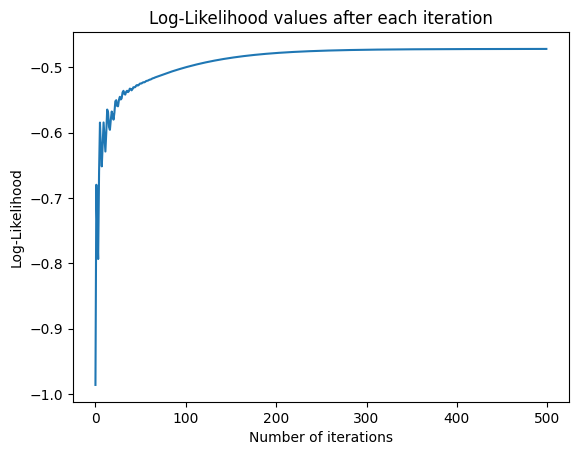

Fitting model: Logistic Regression (IRLS) with interactions


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [08:25<00:00,  1.01s/it]


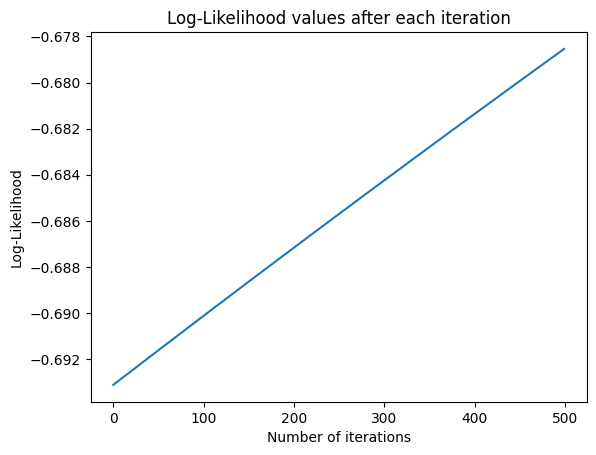

Fitting model: Logistic Regression (IRLS)


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [04:54<00:00,  1.70it/s]


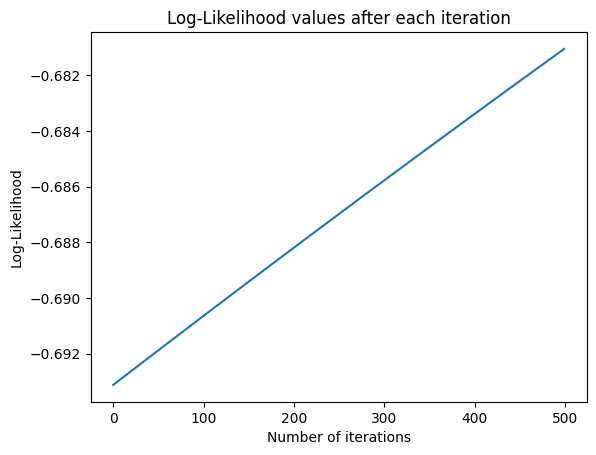

Fitting model: Linear Discriminant Analysis
Fitting model: Quadratic Discriminant Analysis
Fitting model: Decision Tree
Fitting model: Random Forest
Dataset 4:
Fitting model: Logistic Regression (SGD) with interactions


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 93.82it/s]


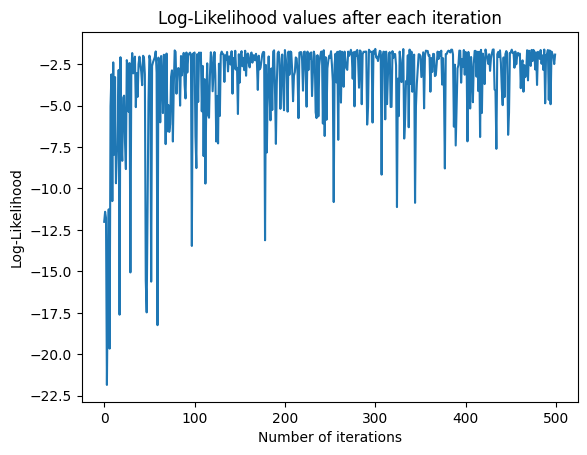

Fitting model: Logistic Regression (SGD)


Optimizing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 108.99it/s]


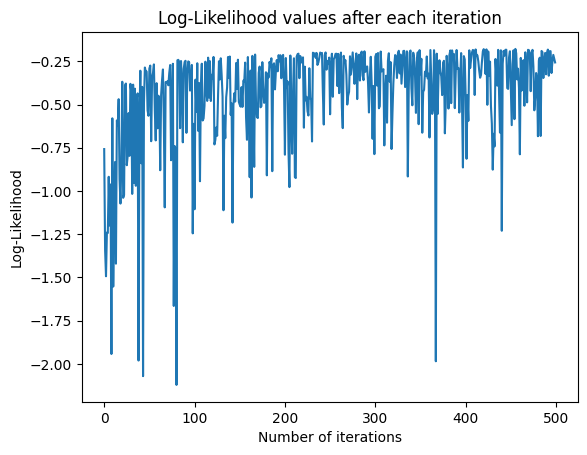

Fitting model: Logistic Regression (Adam) with interactions


Optimizing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1993.26it/s]


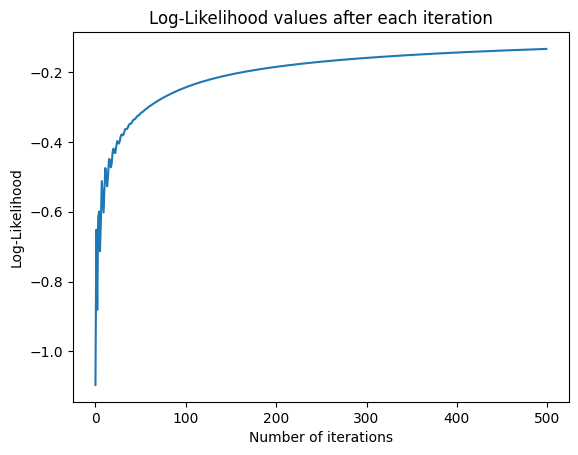

Fitting model: Logistic Regression (Adam)


Optimizing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 5746.49it/s]


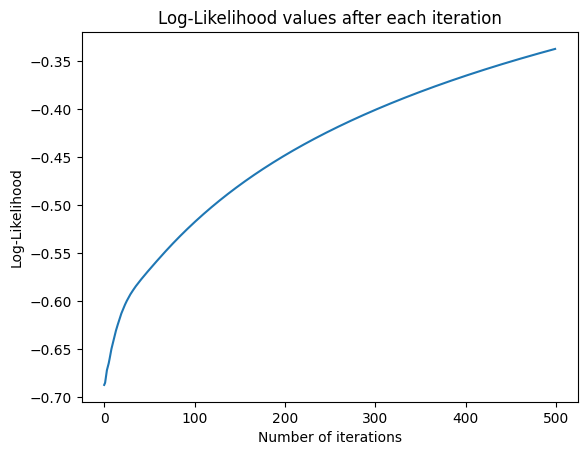

Fitting model: Logistic Regression (IRLS) with interactions


Optimizing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 114.22it/s]


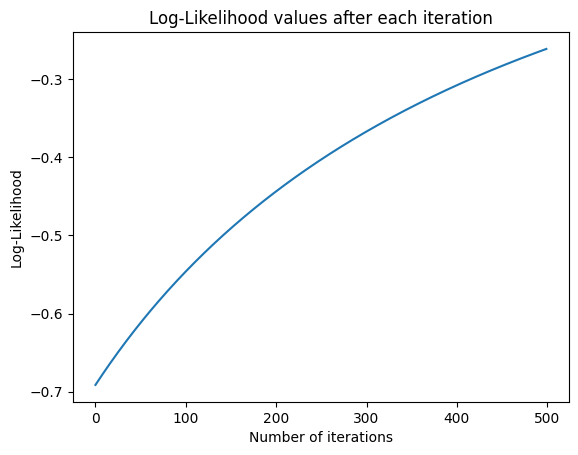

Fitting model: Logistic Regression (IRLS)


Optimizing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 764.51it/s]


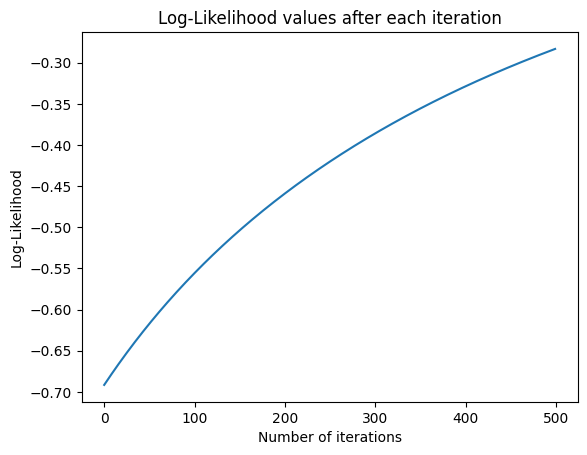

Fitting model: Linear Discriminant Analysis
Fitting model: Quadratic Discriminant Analysis
Fitting model: Decision Tree
Fitting model: Random Forest
Dataset 5:
Fitting model: Logistic Regression (SGD) with interactions


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:15<00:00, 31.96it/s]


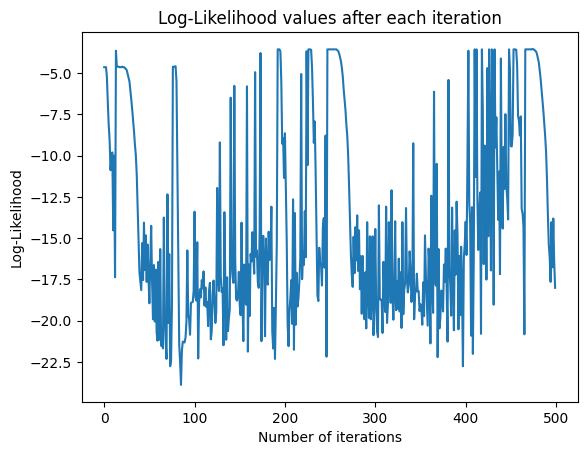

Fitting model: Logistic Regression (SGD)


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:14<00:00, 34.08it/s]


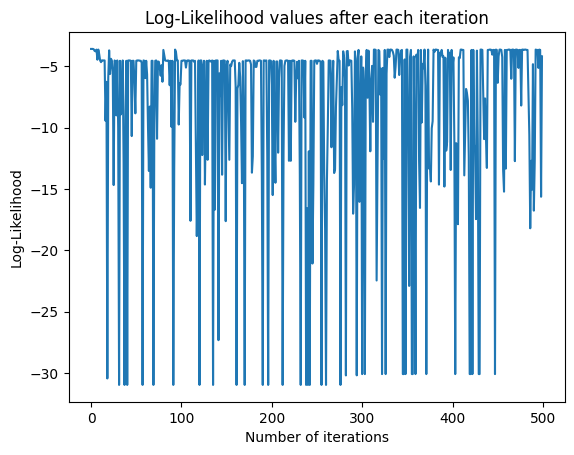

Fitting model: Logistic Regression (Adam) with interactions


Optimizing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 517.37it/s]


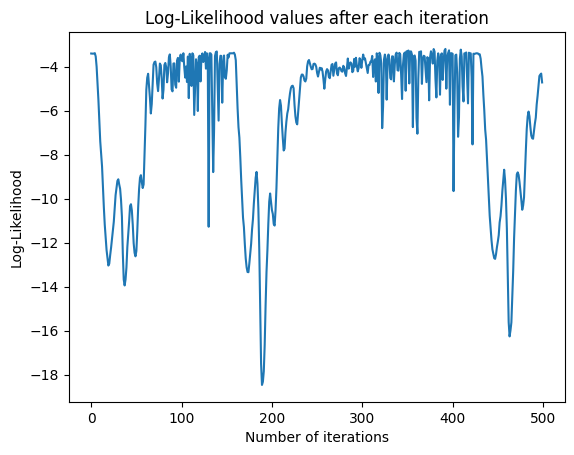

Fitting model: Logistic Regression (Adam)


Optimizing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1470.64it/s]


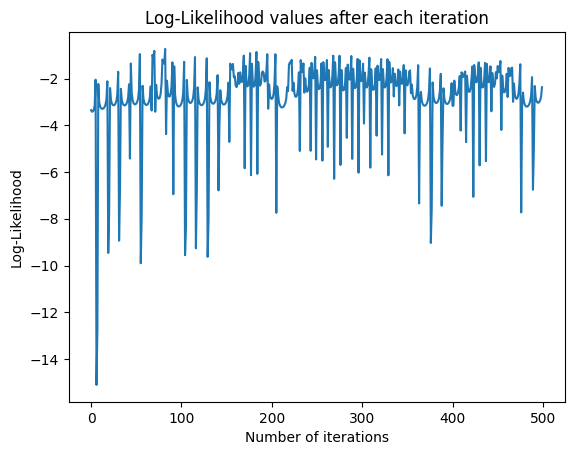

Fitting model: Logistic Regression (IRLS) with interactions


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:32<00:00, 15.22it/s]


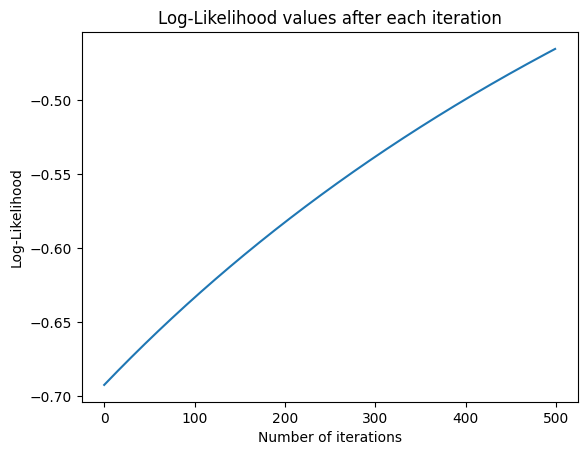

Fitting model: Logistic Regression (IRLS)


Optimizing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 106.89it/s]


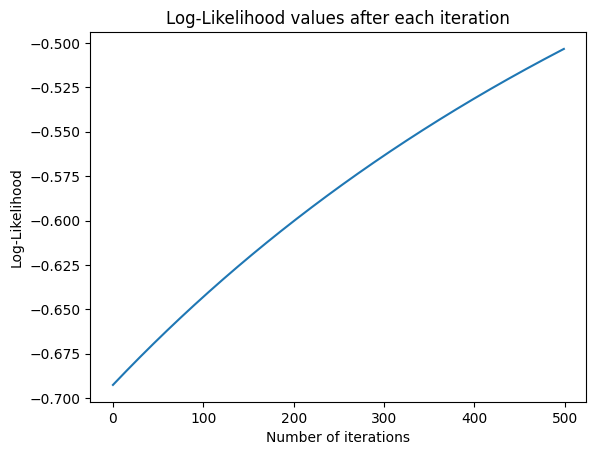

Fitting model: Linear Discriminant Analysis
Fitting model: Quadratic Discriminant Analysis
Fitting model: Decision Tree
Fitting model: Random Forest
Dataset 6:
Fitting model: Logistic Regression (SGD) with interactions


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:16<00:00, 30.76it/s]


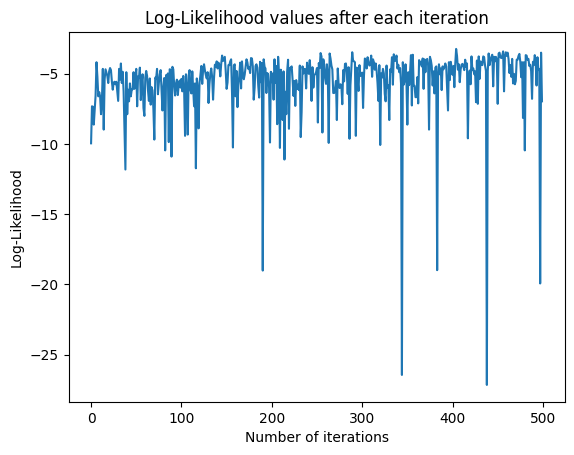

Fitting model: Logistic Regression (SGD)


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:14<00:00, 33.96it/s]


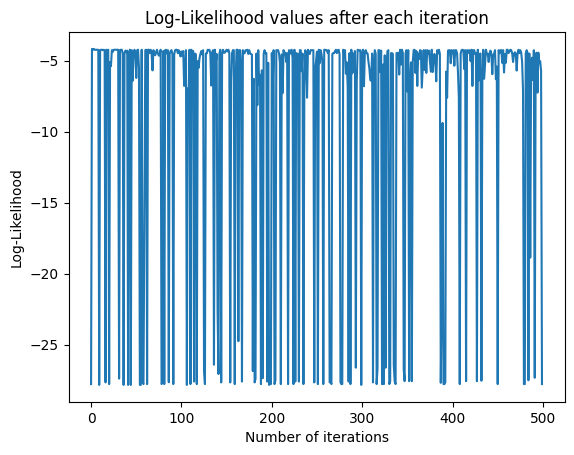

Fitting model: Logistic Regression (Adam) with interactions


Optimizing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 502.34it/s]


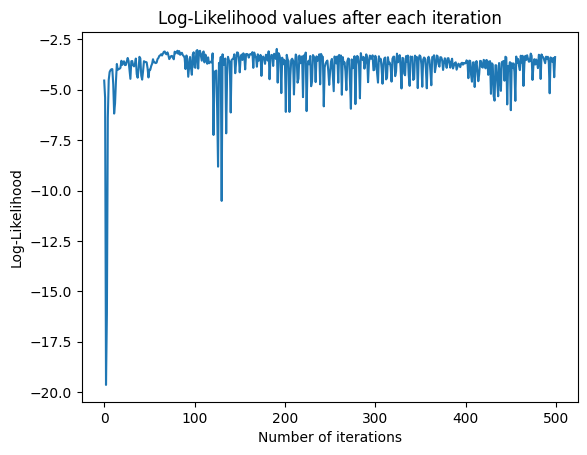

Fitting model: Logistic Regression (Adam)


Optimizing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1805.05it/s]


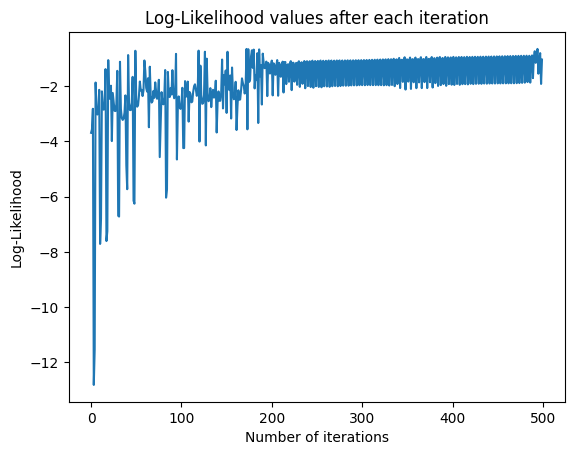

Fitting model: Logistic Regression (IRLS) with interactions


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:29<00:00, 16.68it/s]


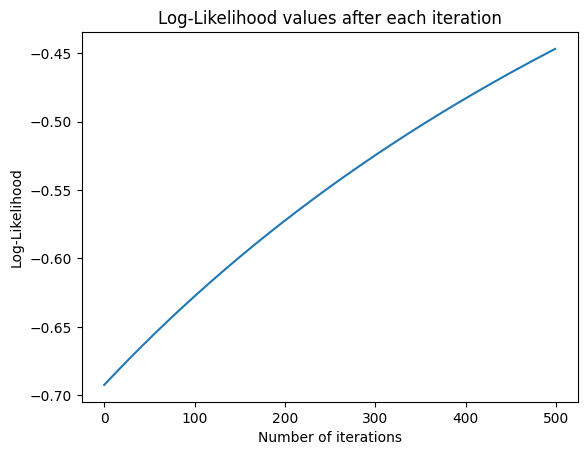

Fitting model: Logistic Regression (IRLS)


Optimizing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 127.53it/s]


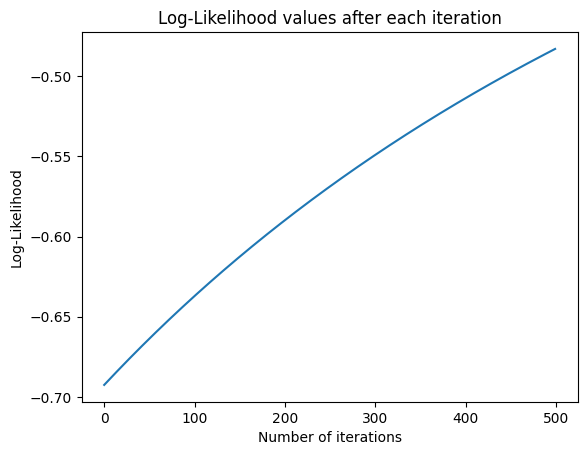

Fitting model: Linear Discriminant Analysis
Fitting model: Quadratic Discriminant Analysis
Fitting model: Decision Tree
Fitting model: Random Forest
Dataset 7:
Fitting model: Logistic Regression (SGD) with interactions


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:20<00:00,  6.19it/s]


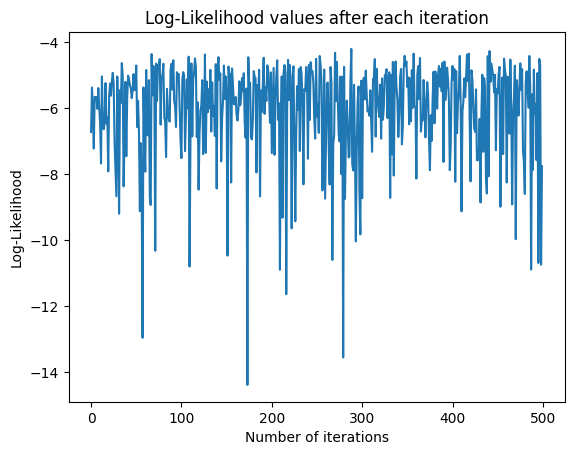

Fitting model: Logistic Regression (SGD)


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:03<00:00,  7.88it/s]


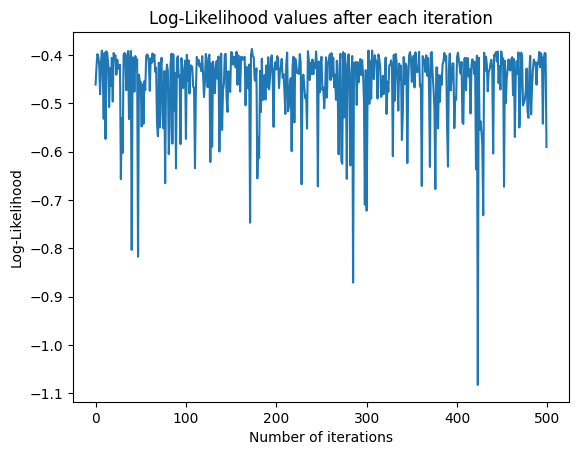

Fitting model: Logistic Regression (Adam) with interactions


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:08<00:00, 60.11it/s]


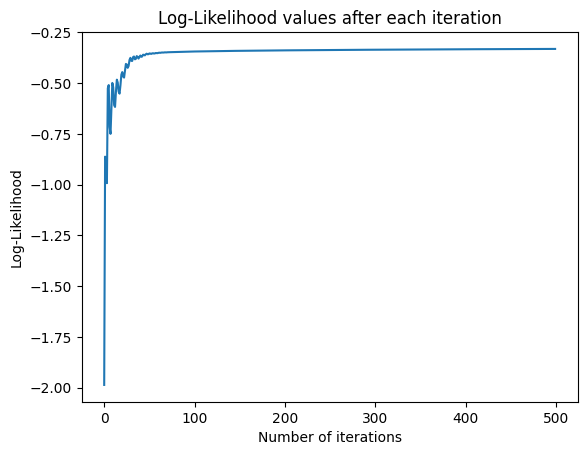

Fitting model: Logistic Regression (Adam)


Optimizing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 425.57it/s]


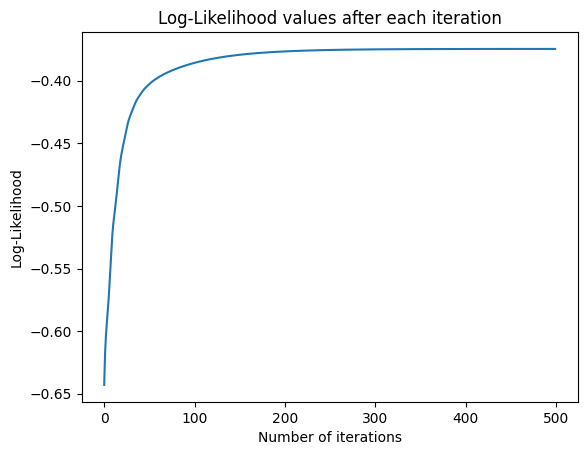

Fitting model: Logistic Regression (IRLS) with interactions


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [07:41<00:00,  1.08it/s]


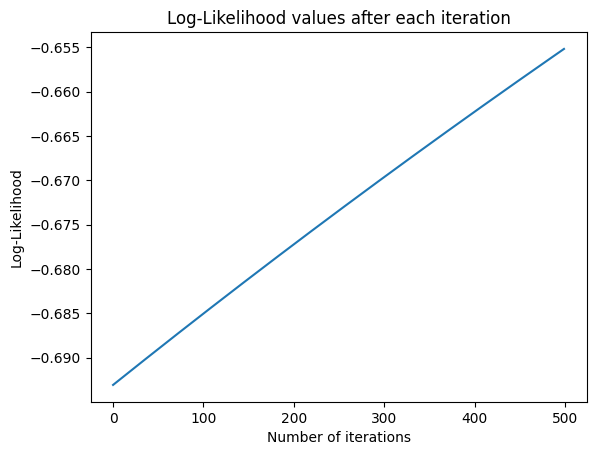

Fitting model: Logistic Regression (IRLS)


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [01:34<00:00,  5.28it/s]


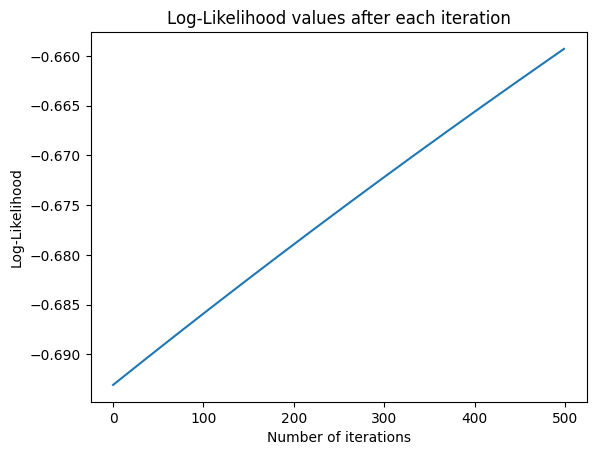

Fitting model: Linear Discriminant Analysis
Fitting model: Quadratic Discriminant Analysis
Fitting model: Decision Tree
Fitting model: Random Forest
Dataset 8:
Fitting model: Logistic Regression (SGD) with interactions


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:28<00:00,  3.37it/s]


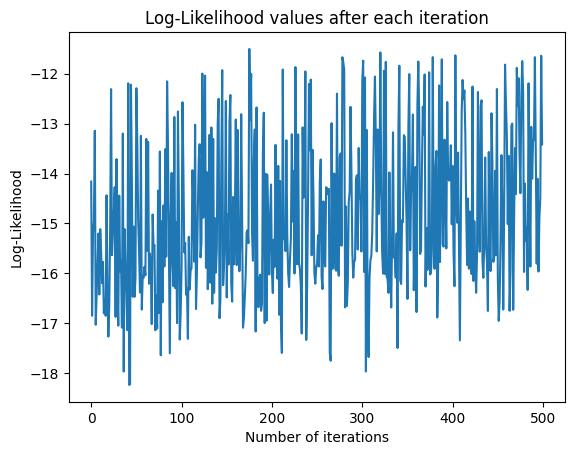

Fitting model: Logistic Regression (SGD)


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:15<00:00,  3.70it/s]


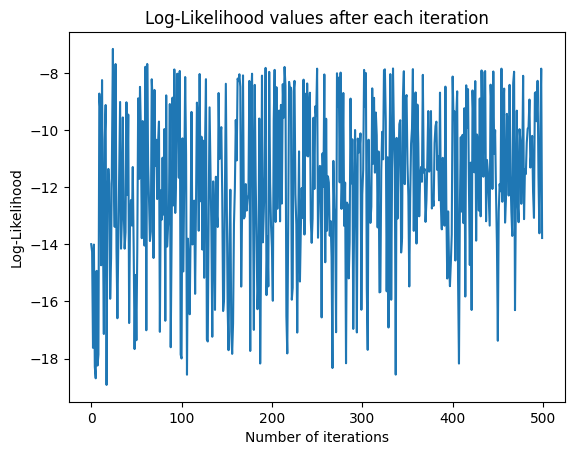

Fitting model: Logistic Regression (Adam) with interactions


Optimizing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 118.66it/s]


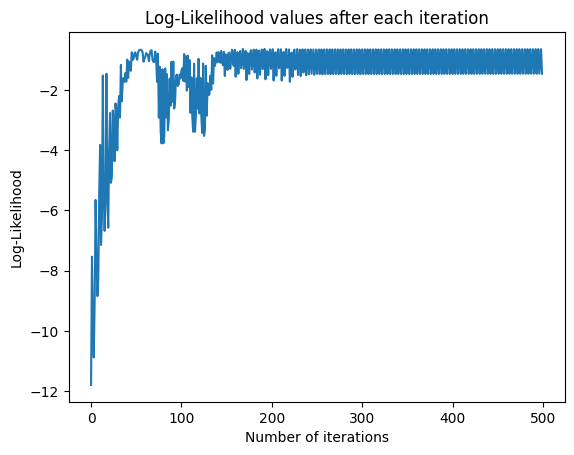

Fitting model: Logistic Regression (Adam)


Optimizing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 297.99it/s]


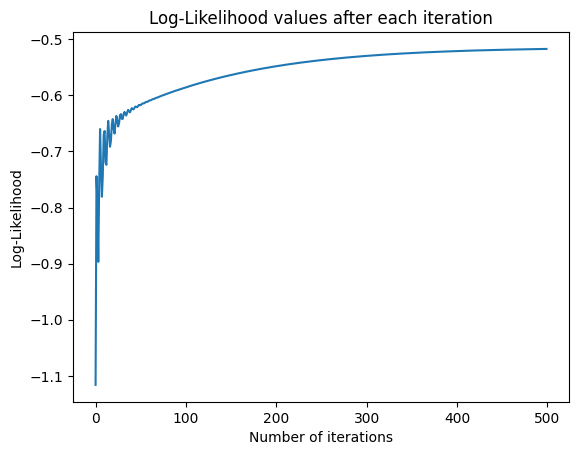

Fitting model: Logistic Regression (IRLS) with interactions


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [09:58<00:00,  1.20s/it]


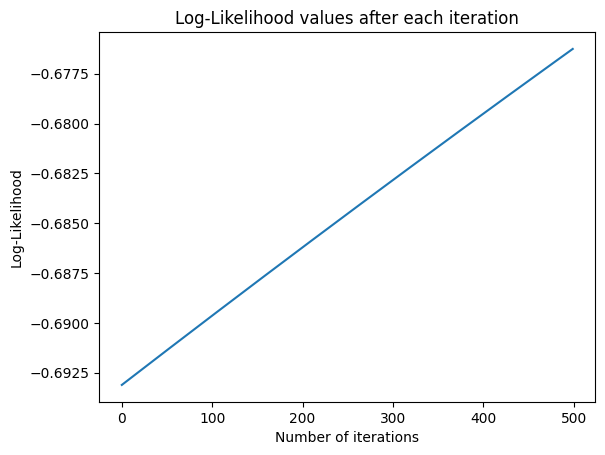

Fitting model: Logistic Regression (IRLS)


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [05:07<00:00,  1.63it/s]


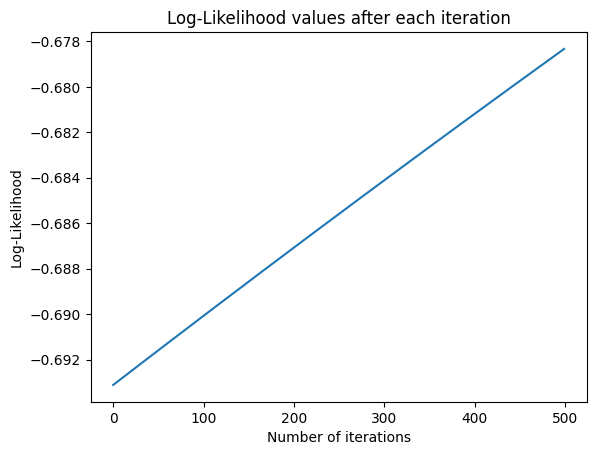

Fitting model: Linear Discriminant Analysis
Fitting model: Quadratic Discriminant Analysis
Fitting model: Decision Tree
Fitting model: Random Forest
Dataset 9:
Fitting model: Logistic Regression (SGD) with interactions


Optimizing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 111.88it/s]


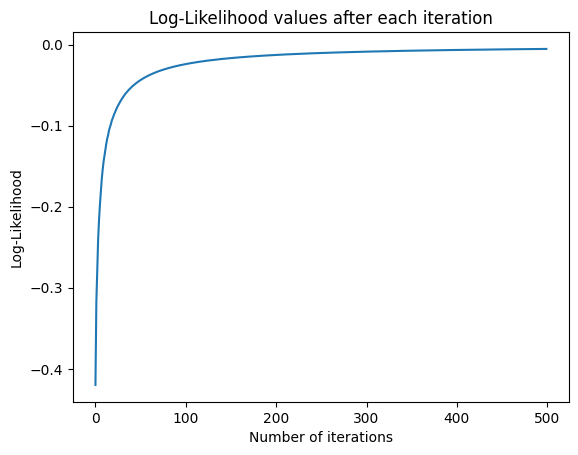

Fitting model: Logistic Regression (SGD)


Optimizing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 127.64it/s]


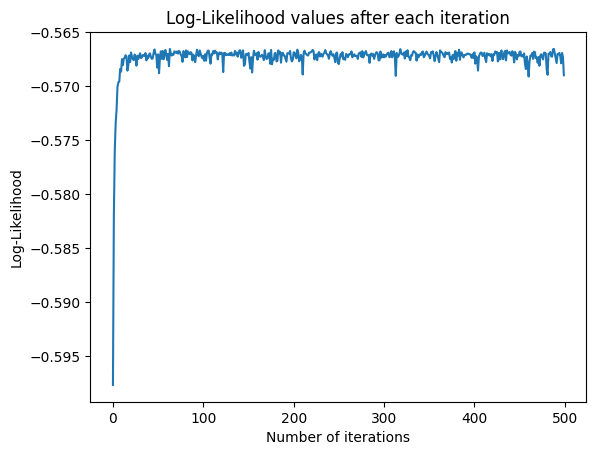

Fitting model: Logistic Regression (Adam) with interactions


Optimizing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1770.04it/s]


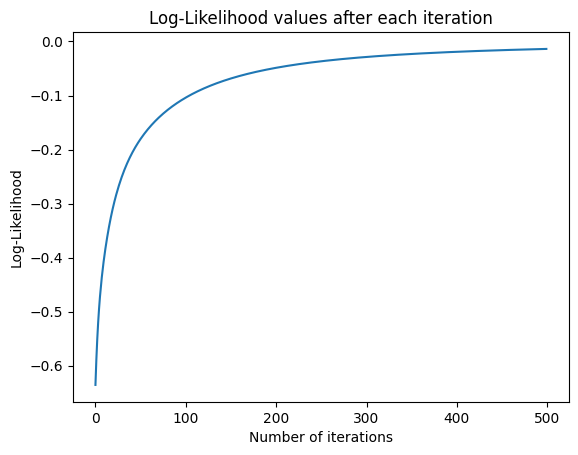

Fitting model: Logistic Regression (Adam)


Optimizing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 2178.35it/s]


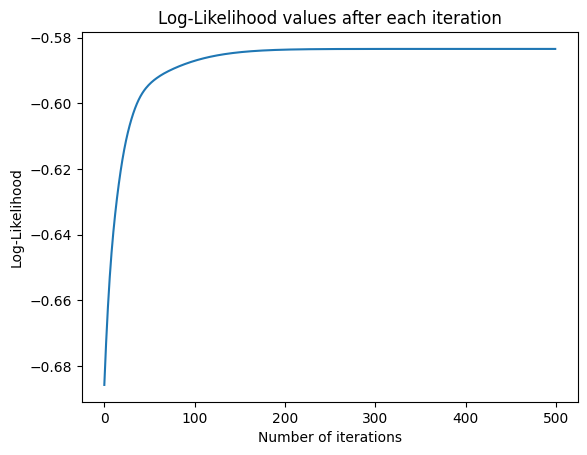

Fitting model: Logistic Regression (IRLS) with interactions


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:17<00:00, 28.93it/s]


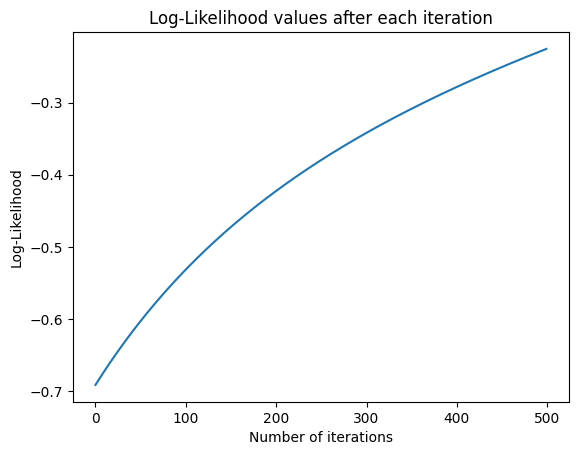

Fitting model: Logistic Regression (IRLS)


Optimizing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 502.05it/s]


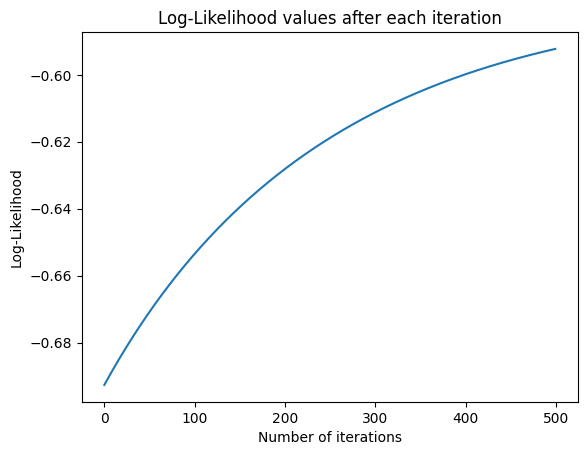

Fitting model: Linear Discriminant Analysis
Fitting model: Quadratic Discriminant Analysis
Fitting model: Decision Tree
Fitting model: Random Forest


In [4]:
results = compare_with_different_classifiers(1)

In [5]:
results

,Dataset,Classifier,Avg_Balanced_Accuracy
0,Dataset_1,Logistic Regression (SGD) with interactions,1.000000
1,Dataset_1,Logistic Regression (SGD),0.986034
2,Dataset_1,Logistic Regression (Adam) with interactions,1.000000
3,Dataset_1,Logistic Regression (Adam),0.989510
4,Dataset_1,Logistic Regression (IRLS) with interactions,0.993631
...,...,...,...
85,Dataset_9,Logistic Regression (IRLS),0.583333
86,Dataset_9,Linear Discriminant Analysis,0.638752
87,Dataset_9,Quadratic Discriminant Analysis,0.564516
88,Dataset_9,Decision Tree,0.754011


Dataset 1:
Fitting model: Logistic Regression (SGD) with interactions


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:10<00:00, 48.77it/s]


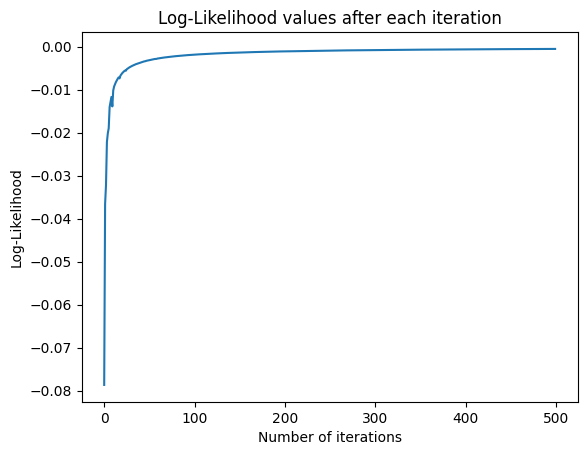

Fitting model: Logistic Regression (SGD)


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:12<00:00, 41.33it/s]


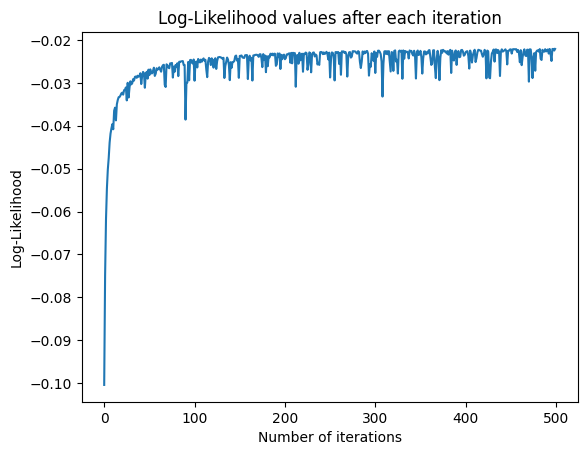

Fitting model: Logistic Regression (Adam) with interactions


Optimizing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1798.04it/s]


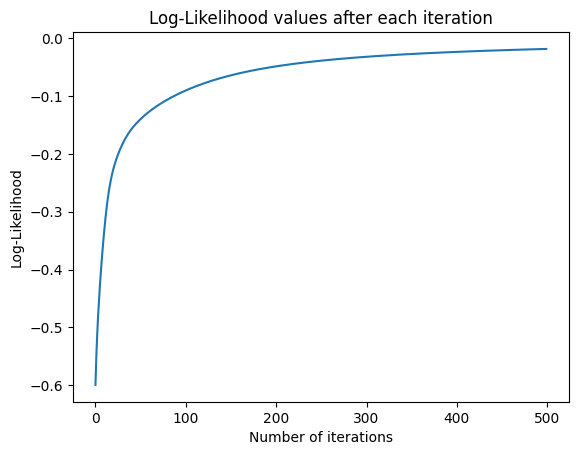

Fitting model: Logistic Regression (Adam)


Optimizing: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1929.09it/s]


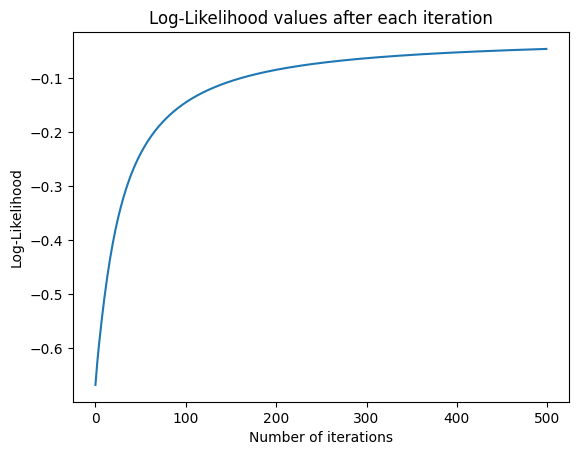

Fitting model: Logistic Regression (IRLS) with interactions


Optimizing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 127.98it/s]


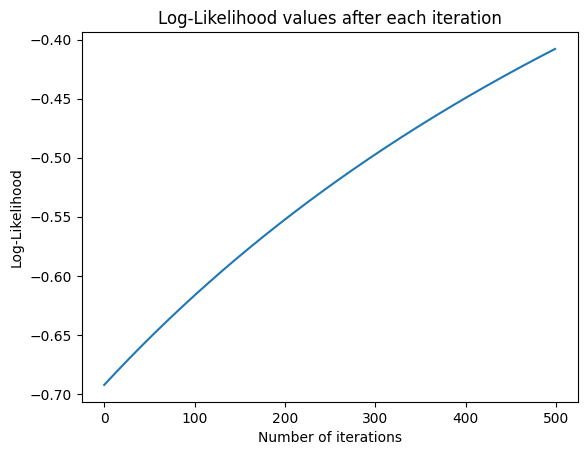

Fitting model: Logistic Regression (IRLS)


Optimizing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 163.18it/s]


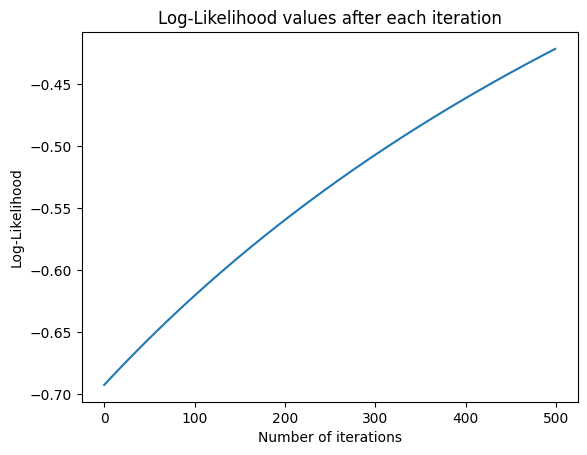

Fitting model: Linear Discriminant Analysis
Fitting model: Quadratic Discriminant Analysis
Fitting model: Decision Tree
Fitting model: Random Forest
Dataset 2:
Fitting model: Logistic Regression (SGD) with interactions


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:32<00:00, 15.17it/s]


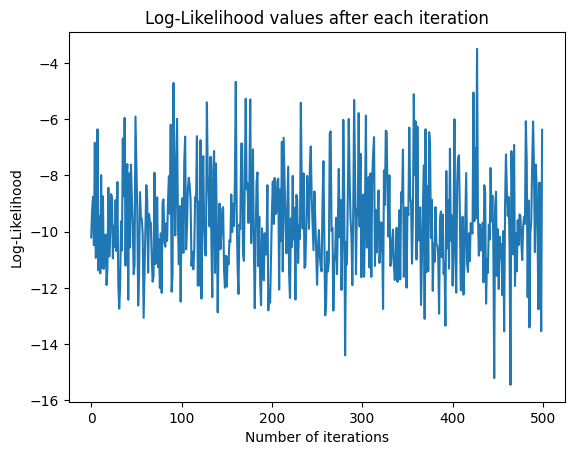

Fitting model: Logistic Regression (SGD)


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:31<00:00, 15.71it/s]


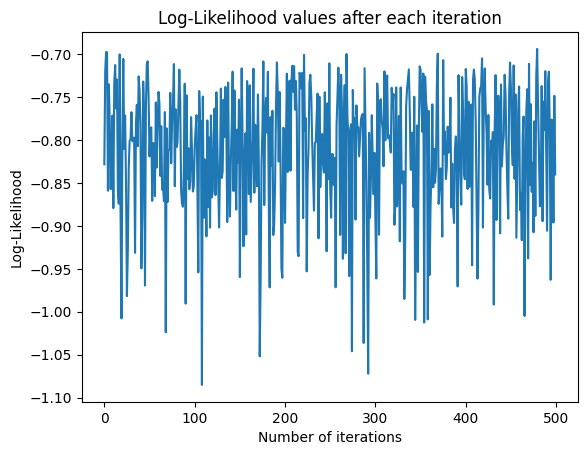

Fitting model: Logistic Regression (Adam) with interactions


Optimizing:  46%|███████████████████████████████████████████████████████████████████████████▏                                                                                      | 232/500 [00:00<00:00, 1332.02it/s]

Stopping criteria reached after  233  iterations


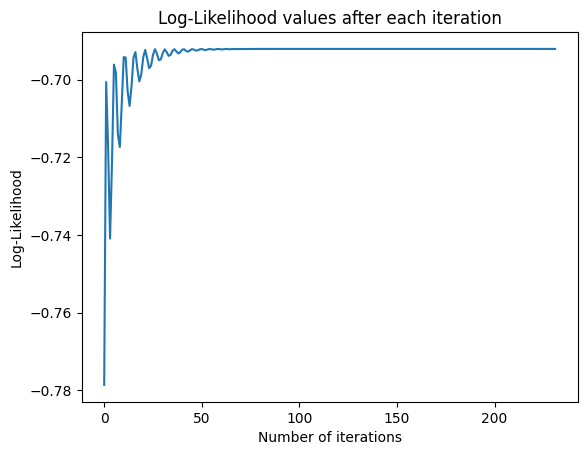

Fitting model: Logistic Regression (Adam)


Optimizing:  46%|█████████████████████████████████████████████████████████████████████████▊                                                                                        | 228/500 [00:00<00:00, 1442.24it/s]


Stopping criteria reached after  229  iterations


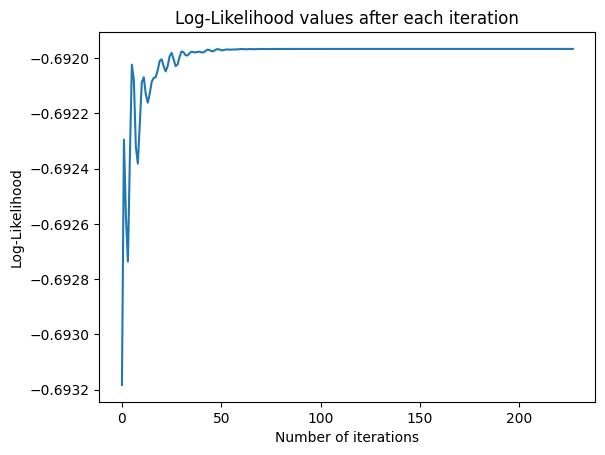

Fitting model: Logistic Regression (IRLS) with interactions


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:20<00:00, 24.79it/s]


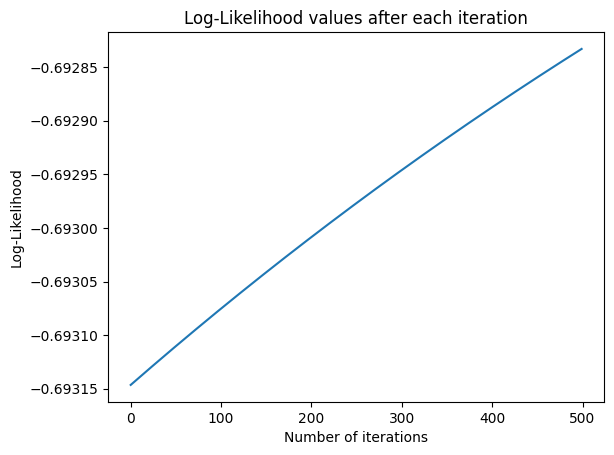

Fitting model: Logistic Regression (IRLS)


Optimizing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:20<00:00, 23.97it/s]


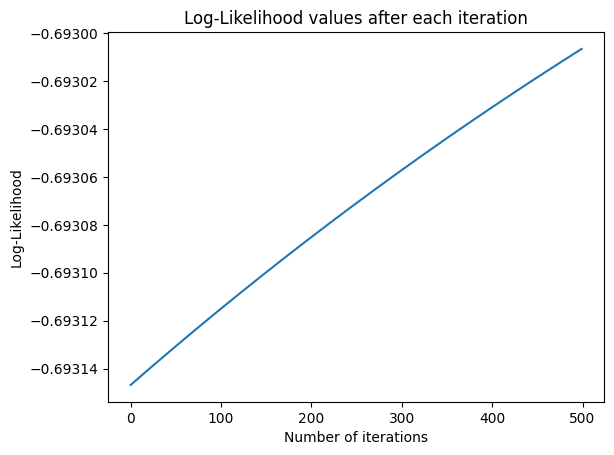

Fitting model: Linear Discriminant Analysis
Fitting model: Quadratic Discriminant Analysis
Fitting model: Decision Tree
Fitting model: Random Forest


In [12]:
results2 = compare_with_different_classifiers(1)

In [13]:
results2

,Dataset,Classifier,Avg_Balanced_Accuracy
0,Dataset_1,Logistic Regression (SGD) with interactions,1.000000
1,Dataset_1,Logistic Regression (SGD),1.000000
2,Dataset_1,Logistic Regression (Adam) with interactions,0.996732
3,Dataset_1,Logistic Regression (Adam),0.981013
4,Dataset_1,Logistic Regression (IRLS) with interactions,0.982639
5,Dataset_1,Logistic Regression (IRLS),0.983553
6,Dataset_1,Linear Discriminant Analysis,0.973154
7,Dataset_1,Quadratic Discriminant Analysis,0.979021
8,Dataset_1,Decision Tree,0.962097
9,Dataset_1,Random Forest,0.992645


In [8]:
from sklearn.linear_model import LogisticRegression

classifiers = {
    "Logistic Regression": LogisticRegression
}

def compare_with_different_classifiers(no_iters=10, test_size=0.2):
    # Compare the classification performance of logistic regression (try all 3 methods: IWLS, SGD, ADAM) and LDA, QDA, Decision tree and Random Forest.
    results = []

    for i, (dataset_number, target_column) in enumerate(DATASETS.items(), start=1):
        df = openml.datasets.get_dataset(dataset_number).get_data()[0]

        X, y = prepare_data(df, target_column)
        print(f"Dataset {i}:")

        for name, params_or_model in list(classifiers.items()):
            accuracy = []

            # if "Logistic Regression" in name:
                # model = LogisticRegression(**params_or_model)
            # else:
            model = params_or_model()
            print(f"Fitting model: {name}")
            for _ in range(no_iters):
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=test_size, random_state=None
                )

                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                accuracy.append(balanced_accuracy_score(y_test, y_pred))
            avg_accuracy = np.mean(accuracy)
            results.append(
                {
                    "Dataset": f"Dataset_{i}",
                    "Classifier": name,
                    "Avg_Balanced_Accuracy": avg_accuracy,
                }
            )

    return pd.DataFrame(results)

In [9]:
results = compare_with_different_classifiers(1)

Dataset 1:
Fitting model: Logistic Regression
Dataset 2:
Fitting model: Logistic Regression
Dataset 3:
Fitting model: Logistic Regression
Dataset 4:
Fitting model: Logistic Regression
Dataset 5:
Fitting model: Logistic Regression
Dataset 6:
Fitting model: Logistic Regression
Dataset 7:
Fitting model: Logistic Regression
Dataset 8:
Fitting model: Logistic Regression
Dataset 9:
Fitting model: Logistic Regression


In [10]:
results

,Dataset,Classifier,Avg_Balanced_Accuracy
0,Dataset_1,Logistic Regression,0.996732
1,Dataset_2,Logistic Regression,0.484997
2,Dataset_3,Logistic Regression,0.741166
3,Dataset_4,Logistic Regression,0.902564
4,Dataset_5,Logistic Regression,0.514183
5,Dataset_6,Logistic Regression,0.541594
6,Dataset_7,Logistic Regression,0.775462
7,Dataset_8,Logistic Regression,0.645894
8,Dataset_9,Logistic Regression,0.575269
